In [1]:
from catboost import CatBoostClassifier, Pool
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from collections import Counter
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('train.csv')
y=df['ACTION']
X=df.drop(["ACTION"], axis=1)

In [3]:
cat_features = list(range(0, X.shape[1]))

In [4]:
print (cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = CatBoostClassifier(
    eval_metric='AUC',
    learning_rate=0.1,
    random_seed=42,
    ignored_features=[3,5,7],
    od_type='Iter',
    od_wait=20,
    use_best_model=True
    
)
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    logging_level='Silent'
)

In [7]:
prediction_hard = model.predict(X_test)
confusion_matrix(y_test, prediction_hard)

array([[ 156,  213],
       [  74, 6111]])

In [8]:
print("ROC AUC score = ", roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

ROC AUC score =  0.8962924988991199


In [103]:
import pickle
with open('Catboost3', 'wb') as f:
    pickle.dump(model, f)

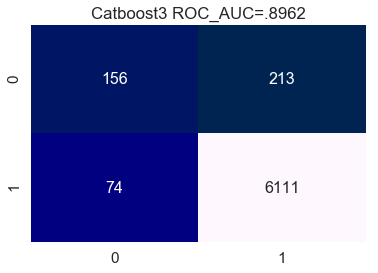

In [10]:
array = confusion_matrix(y_test, prediction_hard)
            
df_cm = pd.DataFrame(array,index = ["0",'1'],
                  columns = ['0','1'])
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sns_plot = sn.heatmap(df_cm, annot=True,
           annot_kws={"size": 16},
           cmap='gist_ncar', 
           fmt='g', 
           cbar=False).set_title("Catboost3 ROC_AUC=.8962")# font size

In [11]:
fig = sns_plot.get_figure()
fig.savefig("Catboost3.png")